In [178]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

In [179]:
#Reading csv file
df=pd.read_csv("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/valladolidA.csv")
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [180]:
#Filtering Only Barcelona Passes
df=df[df["teamId"]=="Barcelona"]
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8


In [181]:
#Adding to New Columns
df["passer"]=df["playerId"]
df["recipient"]=df["playerId"].shift(-1)

passes=df[df["type"]== "Pass"]
successful=passes[passes["outcome"]=="Successful"]

In [182]:
successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0


In [183]:
subs=df[df["type"]=="SubstitutionOff"]
subs=subs["minute"] 
firstSub=subs.min()
firstSub

70

In [184]:
#Pass network of the starting 11
successful=successful[successful["minute"]<firstSub] 
successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0


In [185]:
#Converting the float passer value to an integer
pas=pd.to_numeric(successful["passer"],downcast="integer")
rec=pd.to_numeric(successful["recipient"],downcast="integer")

successful["passer"]=pas
successful["recipient"]=rec

successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15


In [186]:
#Avg Locations on players
average_locations=successful.groupby("passer").agg({"x":["mean"],"y":["mean","count"]})
average_locations.columns=["x","y","count"]
average_locations.head()

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6


In [187]:
#Count of passes between players
pass_between=successful.groupby(["passer","recipient"]).id.count().reset_index()
pass_between.rename({"id":"pass_count"},axis="columns",inplace=True)
pass_between.head()

,passer,recipient,pass_count
0,1,2,3
1,1,4,3
2,1,8,4
3,1,9,1
4,1,15,4


In [188]:
#Merging avg locations of players and no. of passes between players
pass_between = successful.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

pass_between = pass_between.merge(average_locations, left_on='passer', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient', right_index=True, suffixes=['', '_end'])

pass_between.head()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124,50.324,25,68.274359,11.915385,39
1,1,4,3,7.124,50.324,25,32.895833,43.518750,48
2,1,8,4,7.124,50.324,25,53.332927,41.608537,82
3,1,9,1,7.124,50.324,25,69.916667,51.383333,6
4,1,15,4,7.124,50.324,25,38.409091,74.378182,55


In [189]:
#Filtering DataFrame for Pass Count above 3
pass_between=pass_between[pass_between["pass_count"]>3]
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
4,1,15,4,7.124000,50.324000,25,38.409091,74.378182,55
11,2,8,11,68.274359,11.915385,39,53.332927,41.608537,82
13,2,10,11,68.274359,11.915385,39,63.201613,42.351613,62
15,2,21,5,68.274359,11.915385,39,55.663636,52.263636,55
16,2,28,7,68.274359,11.915385,39,49.156863,16.282353,51
17,4,1,5,32.895833,43.518750,48,7.124000,50.324000,25
19,4,8,6,32.895833,43.518750,48,53.332927,41.608537,82
21,4,15,20,32.895833,43.518750,48,38.409091,74.378182,55
23,4,21,6,32.895833,43.518750,48,55.663636,52.263636,55


Text(0.5, 1.0, 'Barcelona Pass Network vs Vallodolid')

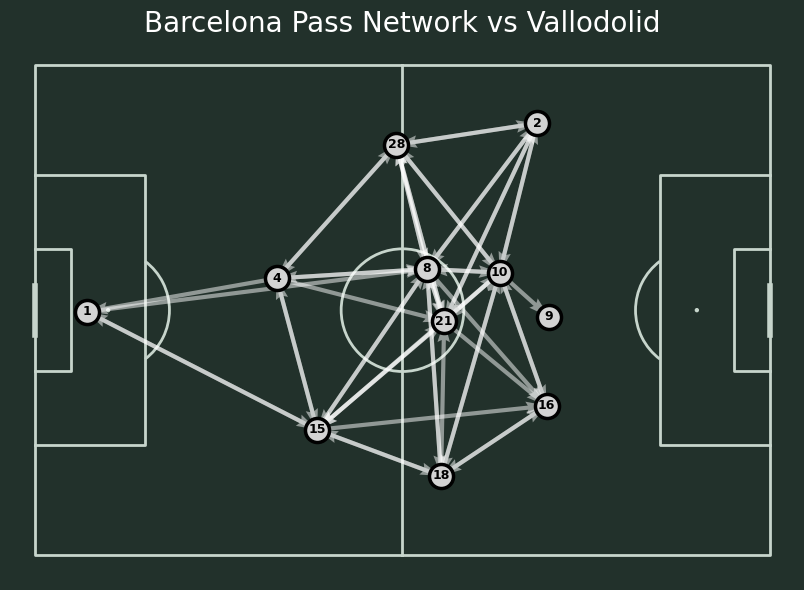

In [195]:
#Plotting a Pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 6), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

#Plotting Arrows
arrows=pitch.arrows(1.2*pass_between.x,
                    0.8*pass_between.y,
                    1.2*pass_between.x_end,
                    0.8*pass_between.y_end,
                    ax=ax,
                    width=3,
                    headwidth=3,
                    color="white",
                    alpha=.5)

#Plotting Scatter Points
nodes=pitch.scatter(1.2*average_locations.x,
                    0.8*average_locations.y,
                    s=300,
                    color="#d3d3d3",
                    edgecolor="black",
                    linewidth=2.5,
                    alpha=1,
                    ax=ax)

#Adding Player No. at Scatter Points
for passer, row in average_locations.iterrows():
    ax.text(
        1.2 * row['x'],    # x position
        0.8 * row['y'],    # y position
        str(passer),       # the index (playerId)
        ha='center', va='center',
        fontsize=9, color='black', weight='bold'
    )
plt.title("Barcelona Pass Network vs Vallodolid",size=20,color="white")